# Forecasting Monthly Spend – NDIS Cost Forecasting Optimizer

This notebook demonstrates how to use time series models to forecast average monthly spend by support category using simulated NDIS data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Load data
df = pd.read_csv('simulated_ndis_data.csv')

# Convert month to datetime
df['month'] = pd.to_datetime(df['month'])

# Aggregate monthly spend by support category
monthly_avg = df.groupby(['month', 'support_category'])['monthly_spend'].mean().reset_index()
monthly_pivot = monthly_avg.pivot(index='month', columns='support_category', values='monthly_spend')
monthly_pivot = monthly_pivot.sort_index()
monthly_pivot.head()

support_category,Capacity Building,Capital,Core
month,,,
2023-01-01,3930.684138,4354.139620,3972.804977
2023-02-01,4122.948286,4160.090455,3936.524954
2023-03-01,3979.776842,4044.564000,3978.330481
2023-04-01,4060.858195,3906.867667,4065.310329
2023-05-01,3923.272683,4063.309880,3975.236667


## Plotting Trends

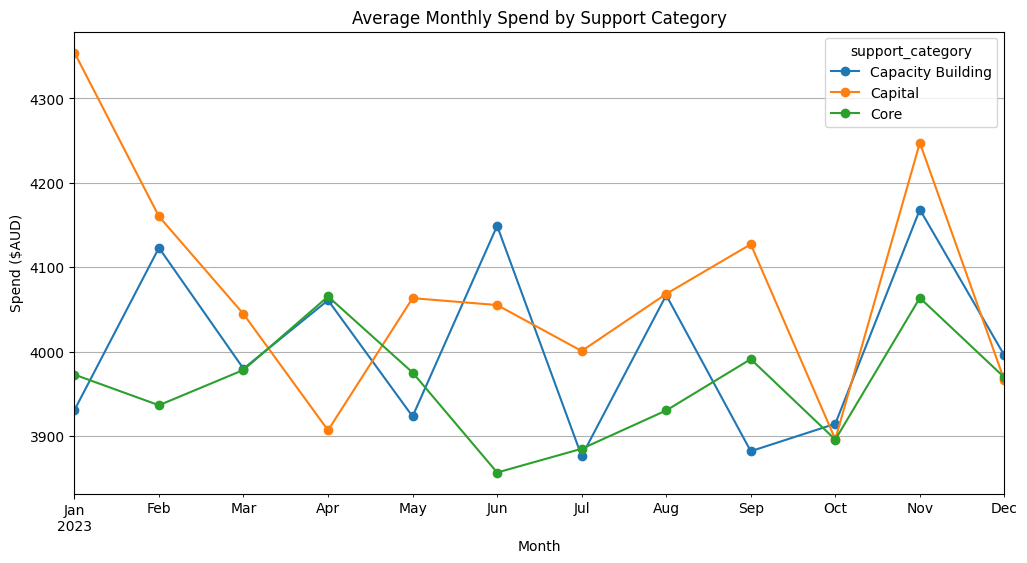

In [2]:
monthly_pivot.plot(figsize=(12,6), marker='o')
plt.title('Average Monthly Spend by Support Category')
plt.xlabel('Month')
plt.ylabel('Spend ($AUD)')
plt.grid(True)
plt.show()

## Forecasting with ARIMA (Core Support Category)

c:\Users\Harsh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Harsh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Harsh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_13080\4188710237.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast.index = pd.date_range(start=core_series.index[-1], periods=6, freq='M')


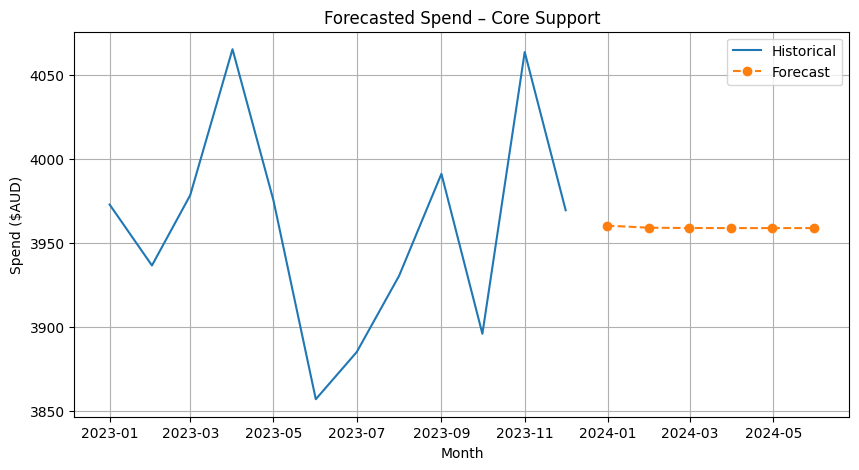

In [3]:
core_series = monthly_pivot['Core'].dropna()

# Fit ARIMA model
model = ARIMA(core_series, order=(1,1,1))
model_fit = model.fit()

# Forecast next 6 months
forecast = model_fit.forecast(steps=6)
forecast.index = pd.date_range(start=core_series.index[-1], periods=6, freq='M')

# Plot
plt.figure(figsize=(10,5))
plt.plot(core_series, label='Historical')
plt.plot(forecast, label='Forecast', linestyle='--', marker='o')
plt.title('Forecasted Spend – Core Support')
plt.xlabel('Month')
plt.ylabel('Spend ($AUD)')
plt.legend()
plt.grid(True)
plt.show()